In [36]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist #28px x 28px images of hand-written digits 0-9 

#unpack the dataset into training and testing variables

(x_train, y_train), (x_test,y_test) = mnist.load_data()


#normalize the data, to put it between 0 and 1
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

#sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #flatten the data 

#2 hidden layers
#dense layer 
#tf.keras.layers.Dense(<# units in layer>, <activation function>)
#tf.mn.relu is a rectified linear function
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))  
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))  

#output layer
model.add(tf.keras.layers.Dense(10,activation = tf.nn.softmax))


#parameters for model training, back propogation portion
#optimizer is the method of optimization?
#loss is the cost function h()
model.compile(optimizer='adam',
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'])


#train the model
model.fit(x_train,y_train,epochs=3)

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 5s 90us/sample - loss: 0.2640 - accuracy: 0.9240
Epoch 2/3
60000/60000 [==============================] - 5s 80us/sample - loss: 0.1075 - accuracy: 0.9666
Epoch 3/3
60000/60000 [==============================] - 5s 87us/sample - loss: 0.0733 - accuracy: 0.9773


In [40]:
#check if we overfit the data - use the x_test
val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 52us/sample - loss: 0.0907 - accuracy: 0.9730
0.09070448011793196
0.973


[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

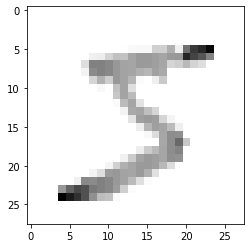

In [41]:
#plot the data

import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap = plt.cm.binary)

print(x_train[0])

In [42]:
#save the model
model.save('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model\assets


In [43]:
#load a model
new_model = tf.keras.models.load_model('num_reader.model')

In [44]:
#use new model to make predictions on some dataset
predictions = new_model.predict(x_test)

#predictions give a probability distribution
print(predictions)

[[8.7270102e-10 2.0178945e-07 2.0551436e-06 ... 9.9990880e-01
  1.5382825e-07 5.9586249e-08]
 [4.8388149e-08 7.9800086e-03 9.9179828e-01 ... 4.3456734e-07
  1.8557532e-05 5.6262267e-10]
 [2.4436663e-06 9.9777979e-01 8.9365363e-05 ... 4.7175685e-04
  1.2574516e-03 7.5655967e-06]
 ...
 [2.3611071e-09 4.3828749e-07 1.3271152e-07 ... 6.5159882e-05
  3.4148729e-06 4.4170483e-05]
 [2.3721993e-08 2.3852490e-07 4.3691156e-07 ... 3.5494145e-07
  2.1673841e-03 5.9586487e-08]
 [1.1058202e-05 9.4431458e-09 3.1226764e-07 ... 1.2643117e-09
  7.0008929e-07 3.2922324e-07]]


In [39]:
import numpy as np

print(np.argmax([predictions[0]]))

7


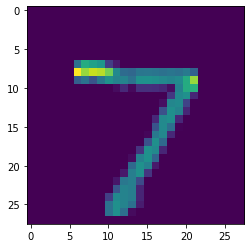

In [45]:
plt.imshow(x_test[0])